__IMPORTS__

In [2]:
#import os
import IGIMF4
import numpy as np
import pandas as pd
plots = IGIMF4.Plots()

In [3]:
#print(os.getcwd())

__INITIAL PARAMETERS__

In [4]:
# Parameters evaluated at time t

metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10
resolution = 50

In [5]:
# Grids
M_igal_v = np.logspace(6, 11,num=resolution)

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=20)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=20)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

metallicity_v = np.log10(Z_massfrac_v/0.0142)

mstar_v=array([7.00000000e-02, 8.18610844e-02, 9.57319592e-02, 1.11953171e-01,
       1.30922972e-01, 1.53107092e-01, 1.79050179e-01, 2.09389169e-01,
       2.44868921e-01, 2.86360506e-01, 3.34882594e-01, 3.91626461e-01,
       4.57985240e-01, 5.35588120e-01, 6.26340347e-01, 7.32470000e-01,
       8.56582693e-01, 1.00172554e+00, 1.17146199e+00, 1.36995927e+00,
       1.60209074e+00, 1.87355550e+00, 2.19101836e+00, 2.56227341e+00,
       2.99643542e+00, 3.50416362e+00, 4.09792334e+00, 4.79229212e+00,
       5.60431757e+00, 6.55393591e+00, 7.66446144e+00, 8.96315893e+00,
       1.04819130e+01, 1.22580109e+01, 1.43350581e+01, 1.67640486e+01,
       1.96046171e+01, 2.29265031e+01, 2.68112629e+01, 3.13542722e+01,
       3.66670675e+01, 4.28800844e+01, 5.01458601e+01, 5.86427784e+01,
       6.85794491e+01, 8.01998295e+01, 9.37892145e+01, 1.09681240e+02,
       1.28266075e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([49]),)

Mecl_v=array([5.00000000e

In [6]:
print(f'{metallicity_v=}')

metallicity_v=array([-7.15228834e+00, -6.73123571e+00, -6.31018308e+00, -5.88913045e+00,
       -5.46807782e+00, -5.04702519e+00, -4.62597255e+00, -4.20491992e+00,
       -3.78386729e+00, -3.36281466e+00, -2.94176203e+00, -2.52070940e+00,
       -2.09965677e+00, -1.67860413e+00, -1.25755150e+00, -8.36498871e-01,
       -4.15446239e-01,  5.60639246e-03,  4.26659024e-01,  8.47711656e-01])


__DOWNSIZING CLASS__

In [7]:
downsizing_obj = IGIMF4.Downsizing(M_igal)

In [8]:
downsizing_obj.downsizing_time

0.9689945113416355

In [9]:
downsizing_obj.M_igal

10000000000.0

In [10]:
downsizing_obj.SFR

10.319975895585161

__IGIMF CLASS__

In [11]:
igimf4_obj = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)

In [12]:
igimf4_obj.alpha_1

0.4948600000000001

In [13]:
igimf4_obj.alpha_2

1.49486

In [14]:
igimf4_obj.SFR

10.319975895585161

In [15]:
igimf4_obj.Mtot

103199758.95585161

In [16]:
ECMF_res = igimf4_obj.ECMF()

In [17]:
ECMF_v = ECMF_res[2](Mecl_v)

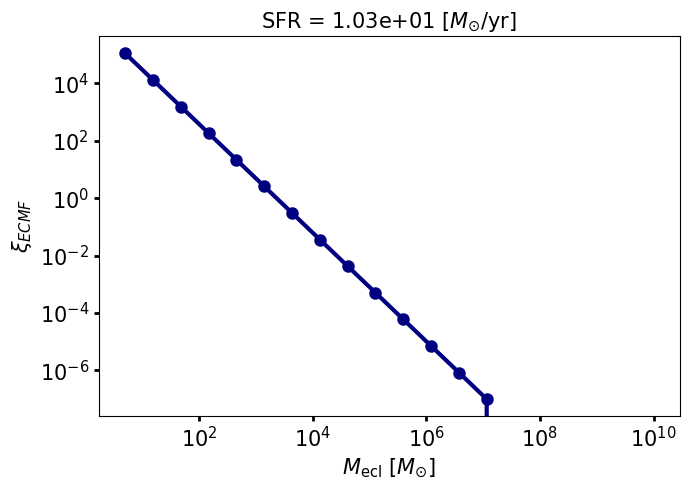

In [18]:
plots.ECMF_plot(Mecl_v, ECMF_v, downsizing_obj.SFR)

In [19]:
SFR_v = np.logspace(-4,3,num=10)
print(f"{SFR_v=}")

SFR_v=array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])


In [20]:
ECMF_v_list = []
beta_ECMF_list = []
MeclMax_list = []
for S in SFR_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    beta_ECMF_list.append(igimf4.beta_ECMF)
    #print(f'SFR={S}, beta={igimf4.beta_ECMF}')
    ECMF_res = igimf4.ECMF()
    ECMF_v = ECMF_res[2](Mecl_v)
    MeclMax_list.append(ECMF_res[1])
    ECMF_v_list.append(ECMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

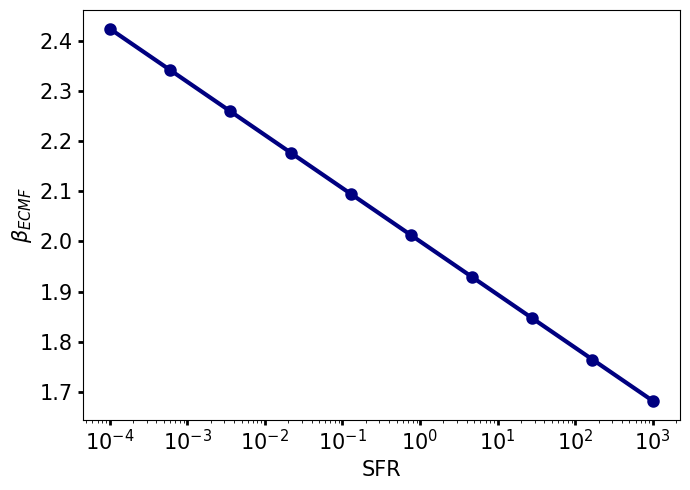

In [21]:
plots.beta_ECMF_plot(SFR_v, beta_ECMF_list)

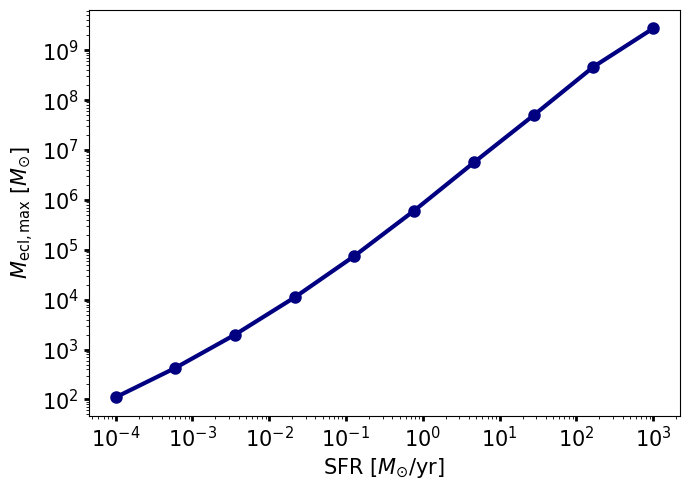

In [22]:
plots.MeclMax_plot(SFR_v, MeclMax_list)

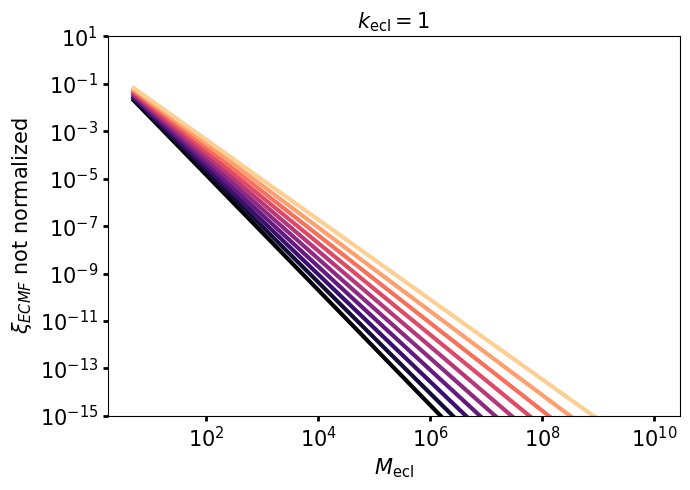

In [23]:
plots.Mecl_power_beta_plot(Mecl_v, beta_ECMF_list, SFR_v)

<Figure size 640x480 with 0 Axes>

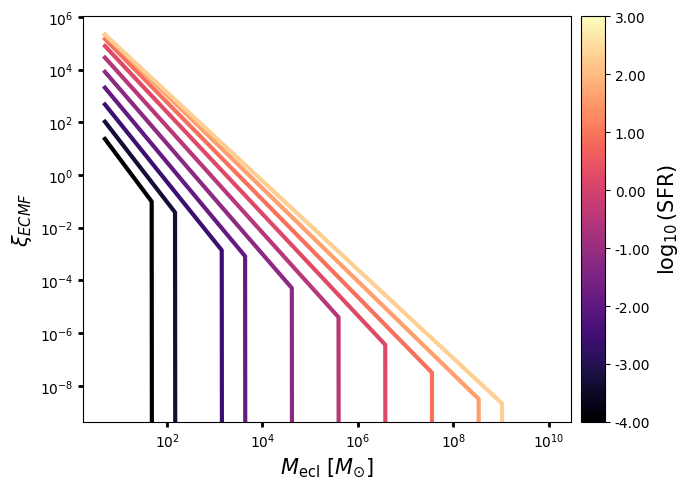

In [24]:
plots.ECMF_plots(Mecl_v, ECMF_v_list, SFR_v)

In [25]:
Mtot_IMF = 1e2
sIMF = igimf4_obj.stellar_IMF(Mtot_IMF)

In [26]:
IMF_v = sIMF[2](mstar_v)

plots.IMF_plot(mstar_v, IMF_v, Mtot_IMF, metallicity)

In [27]:
IMF_v_list = []
m_max_list = []
k_IMF_list = []
for M in Mecl_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)
    sIMF = igimf4.stellar_IMF(M)
    print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
    IMF_v = sIMF[2](mstar_v)
    m_max_list.append(sIMF[1])
    k_IMF_list.append(sIMF[0])
    IMF_v_list.append(IMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

M=5.00e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.94e+00,	 [Z] = -1.00
M=1.54e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.75e+00,	 [Z] = -1.00
M=4.76e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 7.65e+00,	 [Z] = -1.00
M=1.47e+02,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.60e+01,	 [Z] = -1.00
M=4.54e+02,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.30e+01,	 [Z] = -1.00
M=1.40e+03,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 6.25e+01,	 [Z] = -1.00
M=4.33e+03,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.26,	 m_max = 1.03e+02,	 [Z] = -1.00
M=1.34e+04,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.14,	 m_max = 1.36e+02,	 [Z] = -1.00
M=4.12e+04,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.02,	 m_max = 1.47e+02,	 [Z] = -1.00
M=1.27e+05,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=1.90,	 m_max = 1.49e+02,	 [Z] = -1.00
M=3.93e+05,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=1.78,	 m_max = 1.50e+02,	 [Z] = -1.00
M=1.21e+06,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=1.65,	

In [28]:
k_IMF_list = np.array(k_IMF_list)
k_idx = np.where(k_IMF_list<=1e10)[0]
print(Mecl_v[k_idx])
print(k_IMF_list)

[5.00000000e+00 1.54346896e+01 4.76459284e+01 1.47080023e+02
 4.54026898e+02 1.40155284e+03 4.32650661e+03 1.33556573e+04
 4.12280848e+04 1.27268538e+05 3.92870075e+05 1.21276553e+06
 3.74373189e+06 1.15566679e+07 3.56747162e+07 1.10125634e+08
 3.39950995e+08 1.04940761e+09 3.23945615e+09 1.00000000e+10]
[3.08094745e+00 7.30134426e+00 1.87112550e+01 5.06107253e+01
 1.42375331e+02 4.13143449e+02 1.16513420e+03 2.91735149e+03
 7.12275386e+03 1.68173649e+04 3.82594778e+04 8.38853860e+04
 1.77712940e+05 3.65186005e+05 7.31059541e+05 1.43176260e+06
 2.75368731e+06 5.21770343e+06 9.76581309e+06 1.80933528e+07]


[5.00000000e+00 7.74081954e+00 1.19840574e+01 1.85532852e+01
 2.87235265e+01 4.44687271e+01 6.88448783e+01 1.06583156e+02
 1.65008195e+02 2.55459732e+02 3.95493537e+02 6.12288820e+02
 9.47923453e+02 1.46754088e+03 2.27199382e+03 3.51741883e+03
 5.44554089e+03 8.43058986e+03 1.30519350e+04 2.02065346e+04
 3.12830276e+04 4.84312543e+04 7.49795199e+04 1.16080587e+05
 1.79711775e+05 2.78223283e+05 4.30735246e+05 6.66848761e+05
 1.03239118e+06 1.59831077e+06 2.47444705e+06 3.83084962e+06
 5.93078311e+06 9.18182436e+06 1.42149691e+07 2.20071021e+07
 3.40706012e+07 5.27468751e+07 8.16608083e+07 1.26424316e+08
 1.95725563e+08 3.03015253e+08 4.69117279e+08 7.26270439e+08
 1.12438568e+09 1.74073333e+09 2.69494052e+09 4.17220964e+09
 6.45926439e+09 1.00000000e+10]
[3.08094745e+00 4.25652178e+00 5.96825062e+00 8.47518164e+00
 1.21671721e+01 1.76328807e+01 2.57640042e+01 3.79155832e+01
 5.61533698e+01 8.36368943e+01 1.25214742e+02 1.88352341e+02
 2.84580454e+02 4.31755847e+02 6.57580213e+02 9.82315306e+02
 1.40742040e+03 2.01083186e+03 2.86384001e+03 4.06342724e+03
 5.74048624e+03 8.07049136e+03 1.12871676e+04 1.56998735e+04
 2.17156299e+04 2.98669853e+04 4.08472247e+04 5.55548308e+04
 7.51496067e+04 1.01123505e+05 1.35389990e+05 1.80396742e+05
 2.39267734e+05 3.15982238e+05 4.15600190e+05 5.44545746e+05
 7.10963756e+05 9.25167631e+05 1.20020155e+06 1.55254588e+06
 2.00300143e+06 2.57779763e+06 3.30998004e+06 4.24114686e+06
 5.42362212e+06 6.92317067e+06 8.82239293e+06 1.12249696e+07
 1.42609470e+07 1.80933528e+07]

<Figure size 640x480 with 0 Axes>

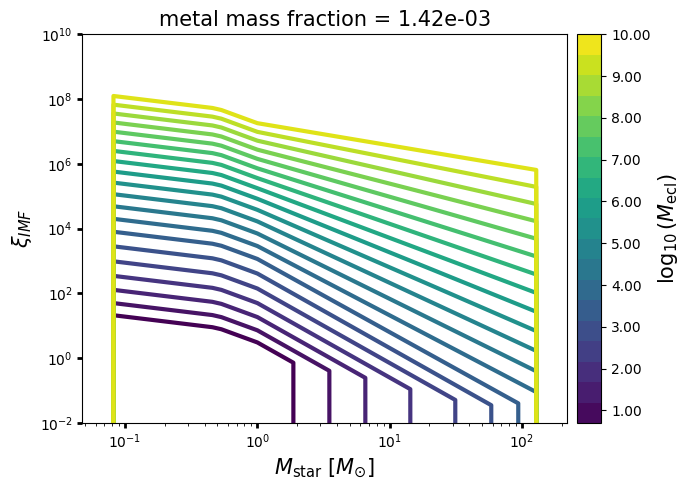

In [29]:
plots.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

In [30]:
metallicity_v

array([-7.15228834e+00, -6.73123571e+00, -6.31018308e+00, -5.88913045e+00,
       -5.46807782e+00, -5.04702519e+00, -4.62597255e+00, -4.20491992e+00,
       -3.78386729e+00, -3.36281466e+00, -2.94176203e+00, -2.52070940e+00,
       -2.09965677e+00, -1.67860413e+00, -1.25755150e+00, -8.36498871e-01,
       -4.15446239e-01,  5.60639246e-03,  4.26659024e-01,  8.47711656e-01])

In [31]:
IMF_Z_v_list = []
for M in Mecl_v:
    IMF_Z_list = []
    for Z in Z_massfrac_v:
        igimf4_Z = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF_Z = igimf4_Z.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF_Z[4], sIMF_Z[5], sIMF_Z[6], sIMF_Z[1], igimf4_Z.metallicity))
        IMF_Z = sIMF_Z[2](mstar_v)
        IMF_Z_list.append(IMF_Z)
        #igimf4_Z.IMF_plots(mstar_v, IMF_Z, Mecl_v, k_idx, Z)
    IMF_Z_v_list.append(IMF_Z_list)
    

M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -6.73
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -6.31
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -5.89
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -5.47
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -5.05
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -4.63
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -4.20
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -3.78
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -3.36
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -2.94
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	

M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.53,	 m_max = 1.50e+02,	 [Z] = -5.89
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.55,	 m_max = 1.50e+02,	 [Z] = -5.47
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.57,	 m_max = 1.50e+02,	 [Z] = -5.05
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.60,	 m_max = 1.50e+02,	 [Z] = -4.63
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.62,	 m_max = 1.50e+02,	 [Z] = -4.20
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.65,	 m_max = 1.50e+02,	 [Z] = -3.78
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.67,	 m_max = 1.50e+02,	 [Z] = -3.36
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.69,	 m_max = 1.50e+02,	 [Z] = -2.94
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.72,	 m_max = 1.50e+02,	 [Z] = -2.52
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.74,	 m_max = 1.50e+02,	 [Z] = -2.10
M=3.24e+09,	 alpha1=0.42,	 alpha2=1.42,	 alpha3=0.77,	 m_max = 1.50e+02,	 [Z] = -1.68
M=3.24e+09,	 alpha1=0.45,	 alpha2=1.45,	 alpha3=0.79,	

In [32]:
IMF_Z_v_list[0][2]

array([ 0.        , 17.47793651, 16.40330111, 15.39473994, 14.44819042,
       13.55983973, 12.72610952, 11.94364142, 11.20928357, 10.5200779 ,
        9.87324822,  9.26618902,  8.69645502,  7.61942896,  6.11482554,
        4.90733512,  3.93828701,  3.15572521,  2.20164066,  1.53600876,
        1.07162035,  0.74763256,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

<Figure size 640x480 with 0 Axes>

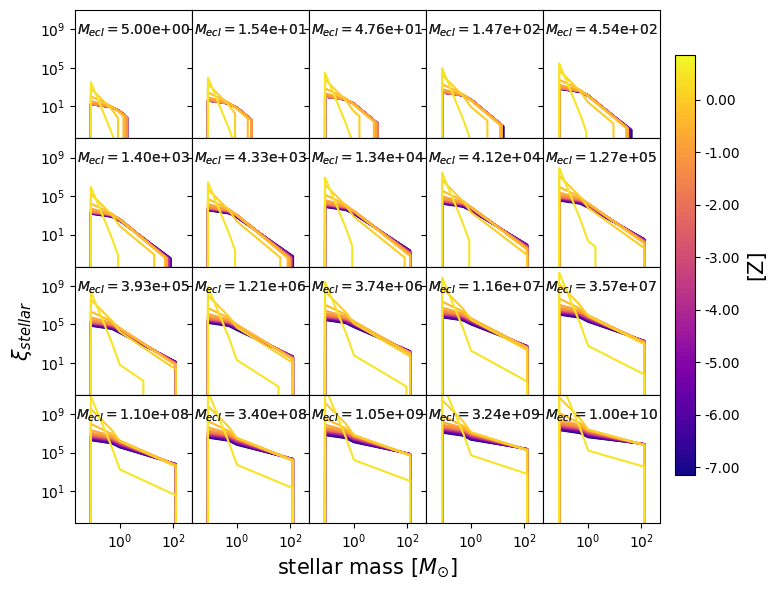

In [33]:
plots.sIMF_subplot(metallicity_v, Mecl_v, mstar_v, IMF_Z_v_list)

<Figure size 640x480 with 0 Axes>

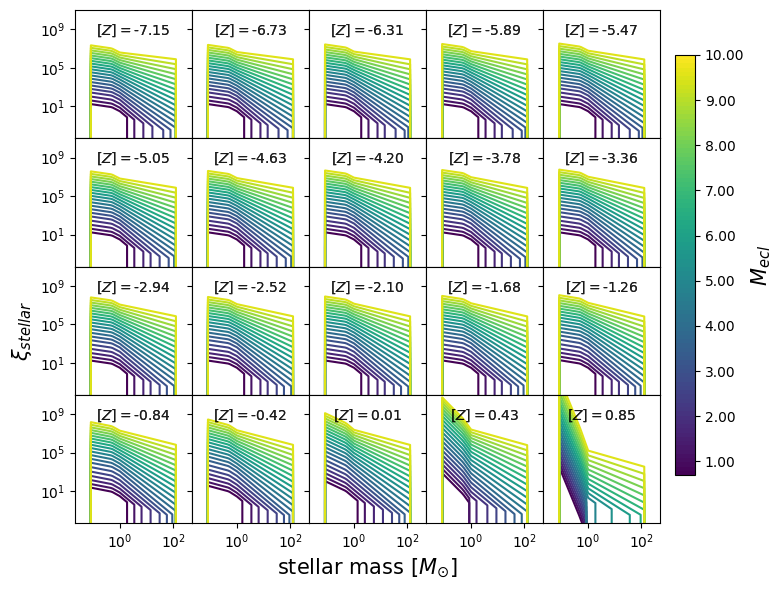

In [34]:
plots.sIMF_subplot_Mecl(metallicity_v, Mecl_v, mstar_v, IMF_Z_v_list)

In [35]:
print(metallicity_v.shape, Mecl_v.shape, mstar_v.shape, len(IMF_Z_v_list))
len(IMF_Z_v_list[0][0])
df = {'metallicity':[],'Mecl':[],'mass_star':[],'IGIMF':[]}
for i in range(len(metallicity_v)):
    for j in range(len(Mecl_v)):
        for k in range(len(mstar_v)):
            df['metallicity'].append(metallicity_v[i])
            df['Mecl'].append(Mecl_v[j])
            df['mass_star'].append(mstar_v[k])
            df['IGIMF'].append(IMF_Z_v_list[i][j][k])
df = pd.DataFrame(df)
df.head()

(20,) (20,) (50,) 20


,metallicity,Mecl,mass_star,IGIMF
0,-7.152288,5.0,0.070000,0.000000
1,-7.152288,5.0,0.081861,17.477922
2,-7.152288,5.0,0.095732,16.403289
3,-7.152288,5.0,0.111953,15.394729
4,-7.152288,5.0,0.130923,14.448181


In [51]:
import os
import sys
sys.path.insert(0,os.getcwd().replace('_scratch',''))

In [54]:
from FriendlyInterpolants import LinearAndNearestNeighbor_FI
IGIMF_interp = LinearAndNearestNeighbor_FI(
    df = df,
    ycol ='IGIMF',
    tf_funs = {
        #'metallicity':lambda x:np.log10(x),
        'Mecl':lambda x:np.log10(x), 'Mecl_prime':lambda x:1/(x*np.log(10)),
        #'IGIMF':lambda y:np.log10(y), 'IGIMF_inv':lambda y:10**y, 'IGIMF_prime':lambda y:1/(y*np.log(10))
    }, 
    name = 'IGIMF')
IGIMF_interp

IGIMF(metallicity,Mecl,mass_star)
	train data description
		        metallicity          Mecl     mass_star         IGIMF
		count  20000.000000  2.000000e+04  20000.000000  2.000000e+04
		mean      -3.152288  7.395855e+08     20.696696  7.311591e+08
		std        2.427969  2.244880e+09     35.296848  5.000794e+10
		min       -7.152288  5.000000e+00      0.070000  0.000000e+00
		25%       -5.152288  1.164671e+03      0.457985  4.433457e+00
		50%       -3.152288  2.600693e+05      3.250300  1.384366e+03
		75%       -1.152288  5.428745e+07     22.926503  1.829367e+05
		max        0.847712  1.000000e+10    150.000000  6.265929e+12
	train data metrics
		                 RMSE Abs: 2.36e-10
		                  MAE Abs: 6.19e-12
		                  Max Abs: 2.24e-08

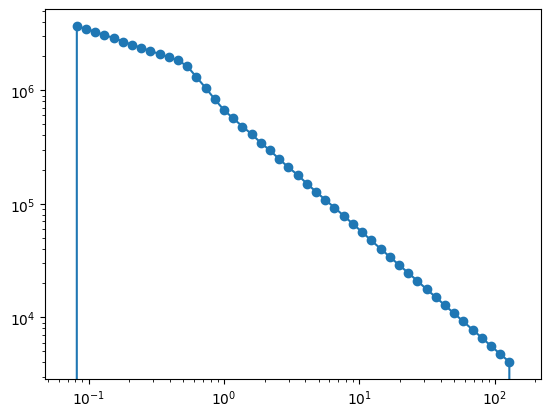

In [55]:
IGIMF_hats = np.zeros_like(mstar_v)
for i,mstar_v_i in enumerate(mstar_v):
    df_test = pd.DataFrame({'metallicity':[-1],'Mecl':[10**5],'mass_star':[mstar_v_i]})
    IGIMF_hats[i] = IGIMF_interp(df_test)
from matplotlib import pyplot
pyplot.loglog(mstar_v,IGIMF_hats,'-o');

<Figure size 640x480 with 0 Axes>

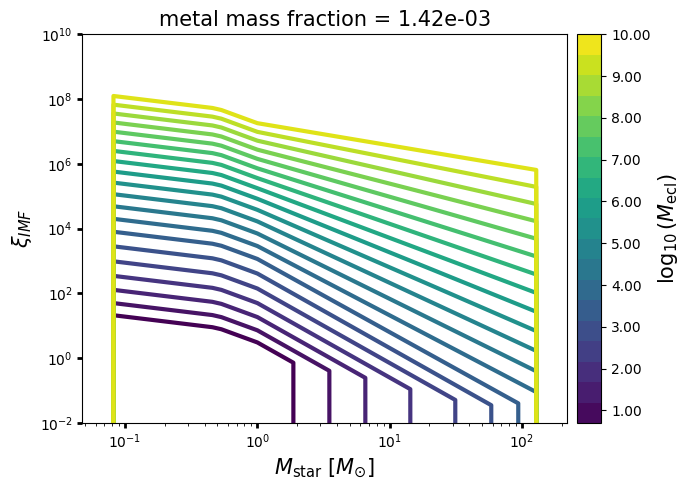

In [34]:
plots.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

In [35]:
IMF_v_Z_list = []
alpha1_Z_list = []
alpha3_Z_list = []
m_max_Z_list = []
k_IMF_Z_list = []
for Z in Z_massfrac_v:
    IMF_v_list = []
    alpha1_list = []
    alpha3_list = []
    m_max_list = []
    k_IMF_list = []
    for M in Mecl_v:
        igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF = igimf4.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
        IMF_v = sIMF[2](mstar_v)
        alpha1_list.append(sIMF[4])
        alpha3_list.append(sIMF[6])
        m_max_list.append(sIMF[1])
        k_IMF_list.append(sIMF[0])
        IMF_v_list.append(IMF_v)
        #igimf4.ECMF_plot(Mecl_v, ECMF_v)
    IMF_v_Z_list.append(IMF_v_list)
    alpha1_Z_list.append(alpha1_list)
    alpha3_Z_list.append(alpha3_list)
    m_max_Z_list.append(m_max_list)
    k_IMF_Z_list.append(k_IMF_list)
    

M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
M=1.54e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 3.82e+00,	 [Z] = -7.15
M=4.76e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 7.78e+00,	 [Z] = -7.15
M=1.47e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.27,	 m_max = 1.71e+01,	 [Z] = -7.15
M=4.54e+02,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.15,	 m_max = 4.40e+01,	 [Z] = -7.15
M=1.40e+03,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.03,	 m_max = 9.16e+01,	 [Z] = -7.15
M=4.33e+03,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.91,	 m_max = 1.30e+02,	 [Z] = -7.15
M=1.34e+04,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.79,	 m_max = 1.45e+02,	 [Z] = -7.15
M=4.12e+04,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.67,	 m_max = 1.49e+02,	 [Z] = -7.15
M=1.27e+05,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.54,	 m_max = 1.50e+02,	 [Z] = -7.15
M=3.93e+05,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.42,	 m_max = 1.50e+02,	 [Z] = -7.15
M=1.21e+06,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.30,	

M=1.34e+04,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.03,	 m_max = 1.40e+02,	 [Z] = -2.94
M=4.12e+04,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.91,	 m_max = 1.48e+02,	 [Z] = -2.94
M=1.27e+05,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.79,	 m_max = 1.49e+02,	 [Z] = -2.94
M=3.93e+05,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.66,	 m_max = 1.50e+02,	 [Z] = -2.94
M=1.21e+06,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.54,	 m_max = 1.50e+02,	 [Z] = -2.94
M=3.74e+06,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.42,	 m_max = 1.50e+02,	 [Z] = -2.94
M=1.16e+07,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.30,	 m_max = 1.50e+02,	 [Z] = -2.94
M=3.57e+07,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.18,	 m_max = 1.50e+02,	 [Z] = -2.94
M=1.10e+08,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=1.06,	 m_max = 1.50e+02,	 [Z] = -2.94
M=3.40e+08,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.94,	 m_max = 1.50e+02,	 [Z] = -2.94
M=1.05e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.82,	 m_max = 1.50e+02,	 [Z] = -2.94
M=3.24e+09,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=0.69,	

M=1.27e+05,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=2.00,	 m_max = 2.03e+00,	 [Z] = 0.85
M=3.93e+05,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.88,	 m_max = 8.56e+00,	 [Z] = 0.85
M=1.21e+06,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.76,	 m_max = 3.97e+01,	 [Z] = 0.85
M=3.74e+06,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.64,	 m_max = 1.05e+02,	 [Z] = 0.85
M=1.16e+07,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.52,	 m_max = 1.40e+02,	 [Z] = 0.85
M=3.57e+07,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.40,	 m_max = 1.48e+02,	 [Z] = 0.85
M=1.10e+08,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.28,	 m_max = 1.50e+02,	 [Z] = 0.85
M=3.40e+08,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.15,	 m_max = 1.50e+02,	 [Z] = 0.85
M=1.05e+09,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=1.03,	 m_max = 1.50e+02,	 [Z] = 0.85
M=3.24e+09,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=0.91,	 m_max = 1.50e+02,	 [Z] = 0.85
M=1.00e+10,	 alpha1=6.71,	 alpha2=7.71,	 alpha3=0.79,	 m_max = 1.50e+02,	 [Z] = 0.85


In [36]:
Z_massfrac_v

array([1.00000000e-09, 2.63665090e-09, 6.95192796e-09, 1.83298071e-08,
       4.83293024e-08, 1.27427499e-07, 3.35981829e-07, 8.85866790e-07,
       2.33572147e-06, 6.15848211e-06, 1.62377674e-05, 4.28133240e-05,
       1.12883789e-04, 2.97635144e-04, 7.84759970e-04, 2.06913808e-03,
       5.45559478e-03, 1.43844989e-02, 3.79269019e-02, 1.00000000e-01])

In [37]:
k_IMF_Z_list[0]

[3.168263910559302,
 7.478183067905145,
 19.11331507105366,
 50.03038870569443,
 118.0105047790484,
 269.7689076875154,
 609.1841397150881,
 1360.0341336483307,
 2964.8357885304836,
 6275.375126203836,
 12904.19619514298,
 25861.78454588441,
 50709.175250763015,
 97634.4571987328,
 185177.27184293116,
 346882.5888345329,
 643146.0738967945,
 1182236.8244647607,
 2157504.6442430154,
 3913060.085603734]

In [38]:
Z_massfrac_v.shape

(20,)

<Figure size 640x480 with 0 Axes>

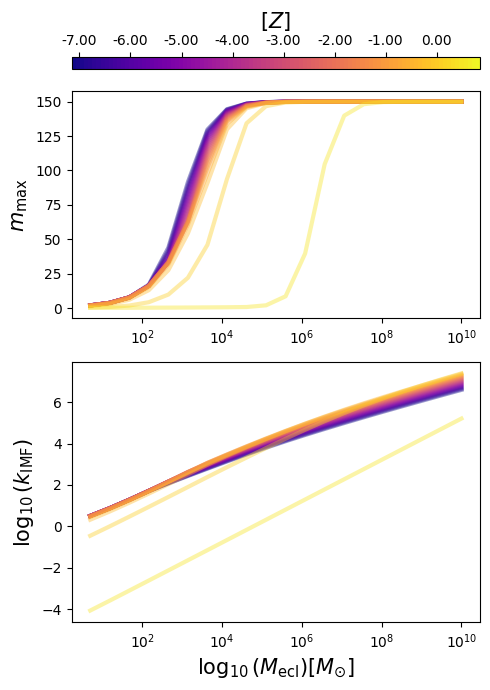

In [39]:
plots.k_Z_plot(Z_massfrac_v, k_IMF_Z_list, m_max_Z_list, Mecl_v, m_star_max=150)

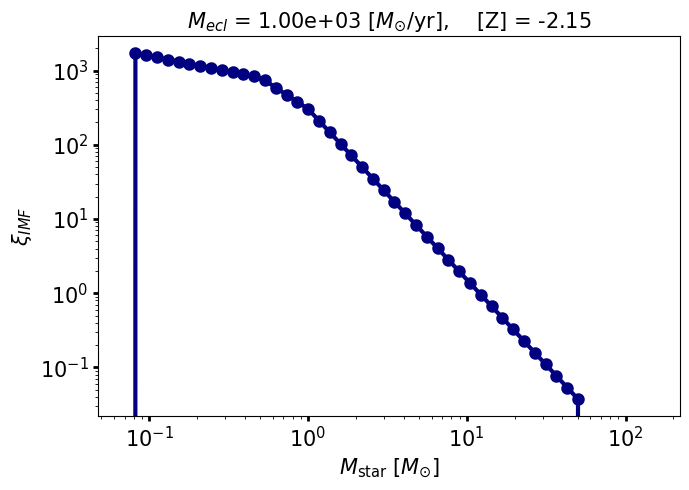

In [40]:
low_Z = 1e-4
Mtot_lowZ_IMF = 1e3
igimf4_metalpoor = IGIMF4.IGIMF(low_Z, downsizing_obj.SFR)
sIMF_lowZ = igimf4_metalpoor.stellar_IMF(Mtot_lowZ_IMF)
plots.IMF_plot(mstar_v, sIMF_lowZ[2](mstar_v), Mtot_lowZ_IMF, low_Z)

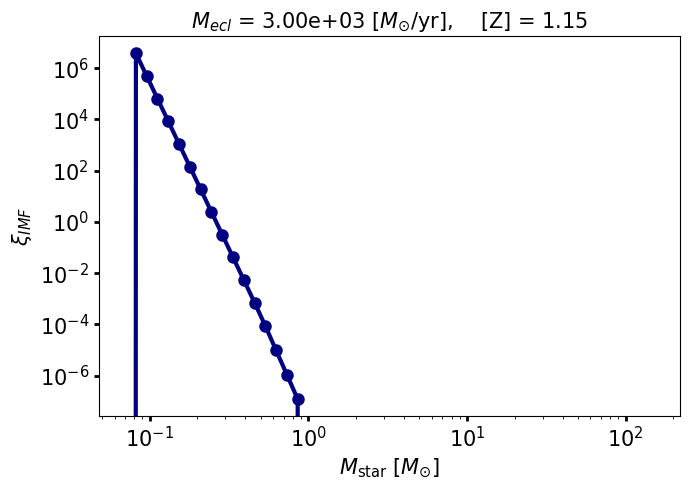

In [41]:
high_Z = 2e-1
Mtot_highZ_IMF = 3e3
igimf4_metalrich = IGIMF4.IGIMF(high_Z, downsizing_obj.SFR)
sIMF_highZ = igimf4_metalrich.stellar_IMF(Mtot_highZ_IMF)
plots.IMF_plot(mstar_v, sIMF_highZ[2](mstar_v), Mtot_highZ_IMF, high_Z)

In [42]:
k_ecl, M_max, ECMF_func, ECM_weighted_func = igimf4_obj.ECMF()

In [43]:
igIMF4 = igimf4_obj.gwIMF()

In [44]:
[igIMF4(m) for m in mstar_v]

[0.0,
 63516187.74167608,
 58781966.56372807,
 54400613.701065086,
 50345827.87978124,
 46593268.20886458,
 43120408.0617578,
 39906399.84895402,
 36931949.869856566,
 34179202.492638506,
 31631632.966833193,
 29273948.225209434,
 27091995.0794446,
 23406676.08691979,
 18523369.04748133,
 14658860.557348868,
 11600599.88487982,
 9173147.763020447,
 6762941.00126874,
 4993252.633579118,
 3692120.6277518016,
 2734169.1385891545,
 2027887.0422608382,
 1506404.6689652405,
 1120800.9134486492,
 835242.0863357758,
 623447.837157778,
 466119.3338997302,
 349065.78454773105,
 261838.23111260723,
 196732.1730662389,
 148058.62408340225,
 111610.73305923943,
 84273.03178541467,
 63734.81500845962,
 48279.63380715245,
 36630.48715683575,
 27835.821242217353,
 21185.463876116202,
 16148.546155495087,
 12327.594747542267,
 9424.53286246234,
 7215.463260305344,
 5531.936611785382,
 4247.015998949906,
 3264.8934815811253,
 2513.141245201807,
 1936.9197603417551,
 1401.1213797957266,
 0.0]